<h1 align="center">  Homework: 5 </h1>
<h2 align="center"> CS 5402 </h2>
<h3 align="center"> By: Md Yasin Kabir, email: mkdv6@mst.edu </h3>


In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn import metrics
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from copy import deepcopy
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Importing the dataset
data = pd.read_csv('football.csv')
print(data.shape)
data.head()

(10, 3)


,Team,winsInSeason2016,winsInSeason2017
0,X1,3,5
1,X2,3,4
2,X3,2,8
3,X4,2,3
4,X5,6,2


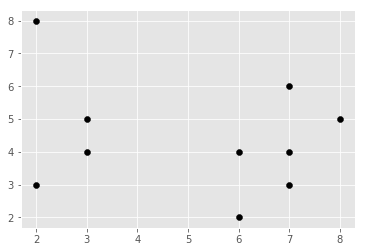

In [3]:
# Getting the values and plotting it
f1 = data['winsInSeason2016'].values
f2 = data['winsInSeason2017'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black')

In [4]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = [4,5]
# Y coordinates of random centroids
C_y = [6,4]
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

In [5]:
def manhattan(a, b, ax=1):
    return np.sum(np.abs(a-b), axis=ax)

def euclidean(a, b, ax=1):
    return np.sum((a-b)**2, axis=ax)
#     return (a-b)

def cosine(a,b, ax=1):
    val = 1- np.dot(a,b) /(np.linalg.norm(a))*np.sum(np.linalg.norm(b))
#     print(val)
    return val

def jaccard(a, b, ax=1):
    return (1-np.sum(np.minimum(a,b),axis=ax)/np.sum(np.maximum(a,b),axis=ax))

distMetric = {"manhattan":0, "euclidean":1, "cosine":2, "jaccard":3}
metrics = {
        distMetric['manhattan']: manhattan,
        distMetric['euclidean']: euclidean,
        distMetric['cosine']: cosine,
        distMetric['jaccard']: jaccard
    }
def sse(X, clusters, C, metric=euclidean):
    sseVal = 0
    for i, centroid in enumerate(C):
        sseVal += np.sum(metric(X[np.where(clusters==i)], centroid))
    
    return sseVal

In [6]:
maxIT = 100

def kmeans(X, C=C, k=2, metric=distMetric['manhattan'], max_iter= maxIT):
    np.random.seed(99)
    
    if C is None:
        C = X[np.random.choice(len(X), size=k, replace=False)]
    # To store the value of centroids when it updates
    C_old = np.ones(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
#     print(C)
#     print(C_old)
    
    metrics = {
        distMetric['manhattan']: manhattan,
        distMetric['euclidean']: euclidean,
        distMetric['cosine']: cosine,
        distMetric['jaccard']: jaccard
    }
    
    error = metrics[metric](C, C_old, None)
    # Loop will run till the error becomes zero
#     print(error)
    error = np.array(error)
    count = 1
    prev_sse = 0
    curr_sse = 0
    while error.any() != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
#             print(X[i])
#             print(C)
            distances = metrics[metric](X[i], C)
#             print(distances)
            cluster = np.argmin([distances])
#             print(cluster)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        curr_sse = sse(X, clusters, C)
        print('Iteration: {}'.format(count))
        print('Current SSE: {}'.format(curr_sse))
        print('Previous SSE: {}'.format(prev_sse))
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
#             print(points)
            C[i] = np.mean(points, axis=0) 
#         print(C)
        error_old = deepcopy(error)
        error = metrics[metric](C, C_old, None)
        if count>0:
            if np.sum(error_old) == np.sum(error):
                break
        if count>max_iter+1:
            break
        count = count+1
        prev_sse = curr_sse
    return clusters, count

Iteration: 1
Current SSE: 58.0
Previous SSE: 0
Iteration: 2
Current SSE: 54.09523809523847
Previous SSE: 58.0
3


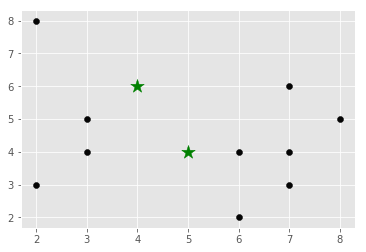

In [7]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = [4,5]
# Y coordinates of random centroids
C_y = [6,4]
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

clusters, count = kmeans(X, C=C, k=2, metric=distMetric['manhattan'], max_iter= 100)
print(count)

[ 0.  1.  0.  1.  1.  1.  1.  1.  1.  0.]


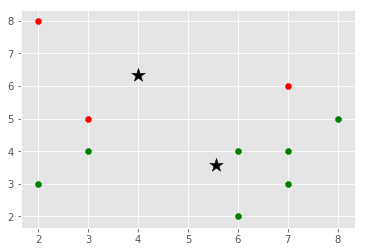

In [8]:
print(clusters)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

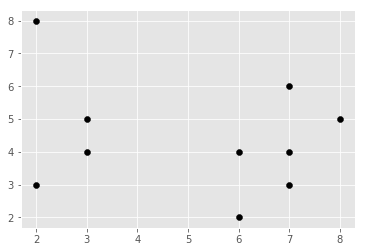

In [9]:
# Getting the values and plotting it
f1 = data['winsInSeason2016'].values
f2 = data['winsInSeason2017'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black')

Iteration: 1
Current SSE: 57.0
Previous SSE: 0
Iteration: 2
Current SSE: 43.96875
Previous SSE: 57.0
Iteration: 3
Current SSE: 27.833333333333485
Previous SSE: 43.96875


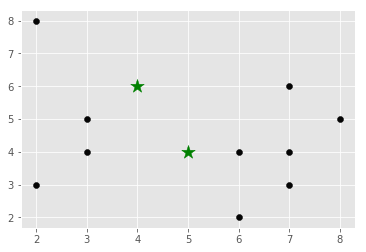

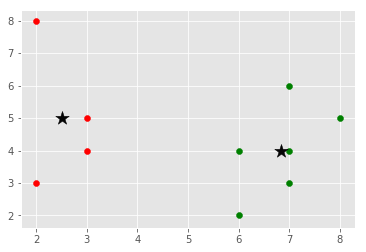

In [10]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = [4,5]
# Y coordinates of random centroids
C_y = [6,4]
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

clusters,count = kmeans(X, C=C, k=2, metric=distMetric['euclidean'])
# print(clusters)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

Iteration: 1
Current SSE: 59.0
Previous SSE: 0
Iteration: 2
Current SSE: 27.833333333333485
Previous SSE: 59.0


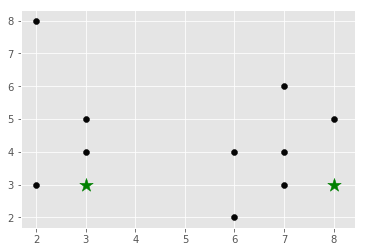

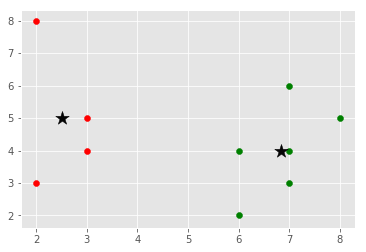

In [11]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = [3,8]
# Y coordinates of random centroids
C_y = [3,3]
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

clusters,count = kmeans(X, C=C, k=2, metric=distMetric['manhattan'])

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

Iteration: 1
Current SSE: 116.0
Previous SSE: 0
Iteration: 2
Current SSE: 57.9047619047621
Previous SSE: 116.0


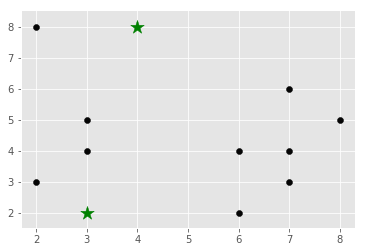

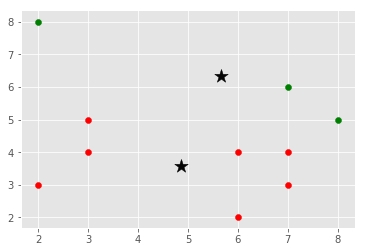

In [12]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = [3,4]
# Y coordinates of random centroids
C_y = [2,8]
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

clusters,count = kmeans(X, C=C, k=2, metric=distMetric['manhattan'])

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## Iris datasets

In [13]:
# Reading the data files and assigning a name into each column
df = pd.read_table("iris.data", sep=",", header=None, names=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])

In [14]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Converting the predicted label "class" to numerical values
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].cat.codes
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# Getting the values and plotting it
# f1 = data['winsInSeason2016'].values
# f2 = data['winsInSeason2017'].values
X = df[df.columns[:-1]].values
# plt.scatter(X, c='black')
# X

In [17]:
clusters, count = kmeans(X, C=None, k=3, metric=distMetric['euclidean'], max_iter= maxIT)
print(count)

Iteration: 1
Current SSE: 133.26
Previous SSE: 0
Iteration: 2
Current SSE: 79.13199166666668
Previous SSE: 133.26
Iteration: 3
Current SSE: 78.940841426146
Previous SSE: 79.13199166666668
4


In [18]:
def predict(clusters, y, k=3):
    indexes = []
    for i in range(k):
        indexes.append(np.where(clusters == i))
    for cluster in indexes:
        mode = int(stats.mode(y[cluster])[0])
        clusters[cluster] = mode
        
    return clusters

In [19]:
from sklearn import metrics
pred_val = predict(clusters, df['class'].values)
metrics.accuracy_score(df['class'].values, pred_val)

0.89333333333333331

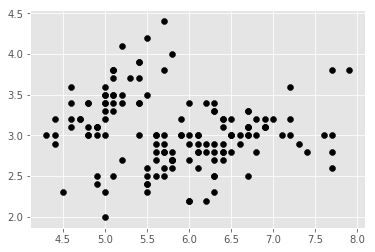

In [20]:
plt.scatter(X[:, 0], X[:, 1], c='black')
# plt.scatter(X[:, 1], X[:, 2], c='black')

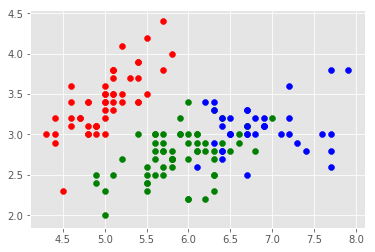

In [21]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#         ax.scatter(points[:, 1], points[:, 2], c=colors[i])
# ax.scatter(C, marker='*', s=200, c='#050505')
# print(len(points))

In [22]:
clusters,count = kmeans(X, C=None, k=3, metric=distMetric['jaccard'], max_iter= maxIT)
print(count)

Iteration: 1
Current SSE: 134.84
Previous SSE: 0
Iteration: 2
Current SSE: 80.52825766992748
Previous SSE: 134.84
Iteration: 3
Current SSE: 80.15236575181797
Previous SSE: 80.52825766992748
Iteration: 4
Current SSE: 79.69157708333331
Previous SSE: 80.15236575181797
Iteration: 5
Current SSE: 79.23624424524454
Previous SSE: 79.69157708333331
Iteration: 6
Current SSE: 79.18674974533107
Previous SSE: 79.23624424524454
7


In [24]:
pred_val = predict(clusters, df['class'].values)
accurcy = metrics.accuracy_score(df['class'].values, clusters)
print(accuracy)

0.97


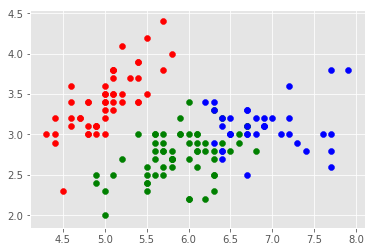

In [25]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#         ax.scatter(points[:, 1], points[:, 2], c=colors[i])
# ax.scatter(C, marker='*', s=200, c='#050505')
# print(len(points))